TensorFlow Version: 2.19.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.7759 - loss: 0.6226 - val_accuracy: 0.8771 - val_loss: 0.3396
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8853 - loss: 0.3107 - val_accuracy: 0.8884 - val_loss: 0.3078
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9040 - loss: 0.2578 - val_accuracy: 0.8976 - val_loss: 0.2722
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9207 - loss: 0.2173 - val_accuracy: 0.9066 - val_loss: 0.2579
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9281 - loss: 0.1942 - val_accuracy: 0.9040 - val_loss: 0.2559
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9065 - loss: 0.2628
Test Accuracy: 0.9039999842643738
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


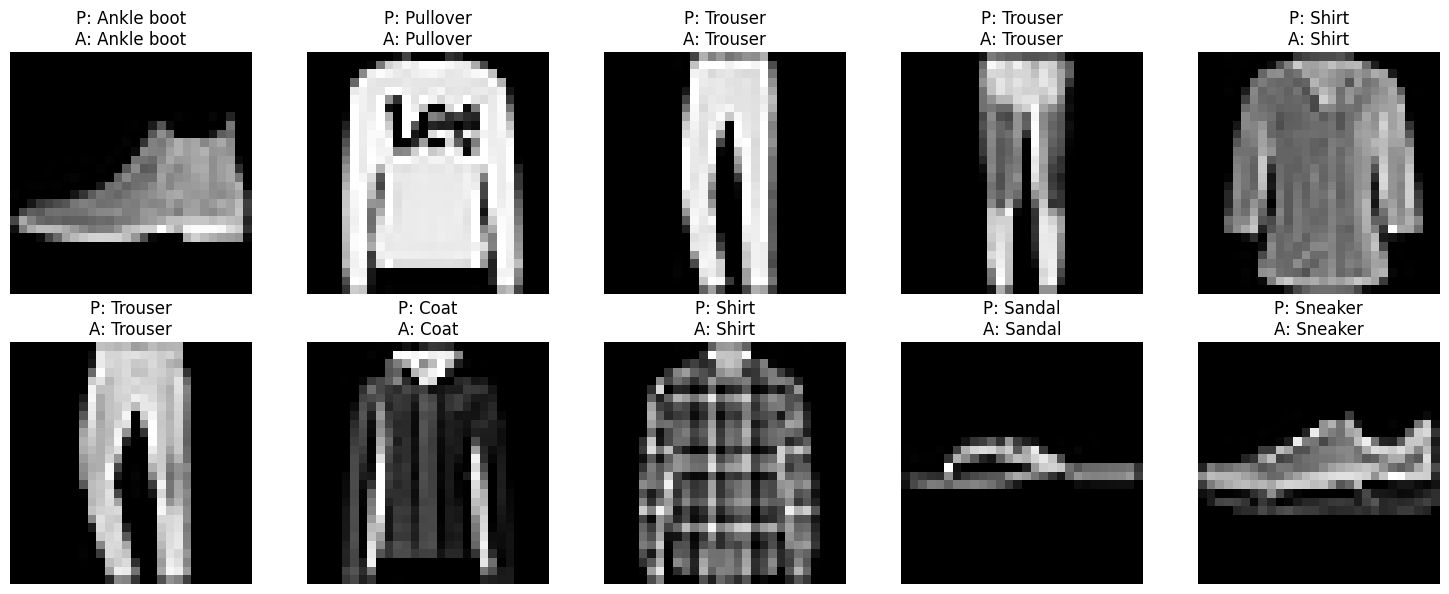

Model saved as fashion_mnist_cnn_model.h5


In [ ]:
# =========================================
# AI-Enhanced Fashion MNIST Classification using CNN
# Full Google Colab Code (Single Cell)
# =========================================

# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Print TensorFlow version
print("TensorFlow Version:", tf.__version__)

# -----------------------------------------
# Load Fashion MNIST Dataset
# -----------------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# -----------------------------------------
# Data Preprocessing
# -----------------------------------------
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Class labels
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# -----------------------------------------
# Build CNN Model
# -----------------------------------------
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Show model architecture
model.summary()

# -----------------------------------------
# Compile Model
# -----------------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------------------
# Train Model
# -----------------------------------------
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

# -----------------------------------------
# Evaluate Model
# -----------------------------------------
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

# -----------------------------------------
# Make Predictions
# -----------------------------------------
predictions = model.predict(x_test)

# -----------------------------------------
# Visualize 10 Images with Prediction Status
# -----------------------------------------
plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    predicted_index = np.argmax(predictions[i])
    predicted_label = class_names[predicted_index]
    actual_label = class_names[y_test[i]]

    # Check correctness
    if predicted_index == y_test[i]:
        status = "Correct"
        color = "green"
    else:
        status = "Wrong"
        color = "red"

    plt.title(f"P: {predicted_label}\nA: {actual_label}")
    plt.xlabel(status, color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# -----------------------------------------
# Save Model
# -----------------------------------------
model.save("fashion_mnist_cnn_model.h5")
print("Model saved as fashion_mnist_cnn_model.h5")